# Categorizing temperatures

In [287]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import math

Goals:
- to categorize states by their weather
- classify states by weather (defined by monthly temperatures)
- classify state months by temperature

Method:
- start by visualizing state weather in 2D by PCA dimensionality reduction
- cluster states by weather
- same for temperature

In [221]:
temperatures = pd.read_csv('../curated/temperatures.csv')

In [222]:
temperatures.head()

,year,month,state,state_name,temperature
0,2012.0,1.0,AL,Alabama,10.3
1,2012.0,2.0,AL,Alabama,11.4
2,2012.0,3.0,AL,Alabama,18.4
3,2012.0,4.0,AL,Alabama,18.7
4,2012.0,5.0,AL,Alabama,23.5


The weather features are the monthly temperatures:

In [223]:
def drop_null_temperatures(df):
    return df[df['temperature'].notnull()]

In [224]:
def pivot_temperatures(df):
    return df.pivot(index='state', columns='month', values='temperature')

In [226]:
def month_to_int(df):
    return df.assign(month=df['month'].astype(int))

In [256]:
temperatures_pivot = (
    temperatures
    .pipe(drop_null_temperatures)
    .pipe(month_to_int)
    .pipe(pivot_temperatures)
)

In [257]:
temperatures_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
AK,-27.0,-13.5,-17.4,-3.6,2.6,10.4,11.4,10.1,4.5,-4.4,-16.0,-20.5
AL,10.3,11.4,18.4,18.7,23.5,25.5,28.1,26.3,23.4,17.2,11.2,10.8
AR,7.1,8.5,17.1,18.1,23.3,25.9,29.4,27.2,23.3,15.4,10.4,8.2
AZ,7.0,7.4,11.0,15.9,21.0,26.2,26.9,27.2,23.4,17.5,12.0,5.4
CA,8.0,8.2,9.8,13.5,18.0,20.8,23.8,25.4,22.8,16.6,11.5,6.1
CO,-1.9,-2.9,5.5,8.9,13.2,20.1,21.6,20.0,15.3,7.8,3.9,-3.8
CT,0.7,2.2,7.3,9.7,16.0,18.9,23.3,22.4,17.8,13.0,5.1,3.2
DC,2.4,4.5,11.5,12.2,20.1,22.2,26.6,24.6,20.0,13.6,5.5,4.8
DE,3.6,4.8,10.4,12.2,18.7,21.5,26.1,24.4,20.1,14.6,6.3,6.2


## PCA

Apply PCA transform to reduce 12 dimensions to 2, and plot scatter diagram:

In [228]:
def pca_weather(df):
    pca = PCA(n_components=2).fit(df)
    data = pca.transform(df)
    return pd.DataFrame(data, index=df.index)

In [229]:
def plot_scatter(df):
    display(df.plot(kind='scatter', x=0, y=1))

In [258]:
pca = (
    temperatures_pivot
    .pipe(pca_weather)
)

In [259]:
pca

,0,1
state,,
AK,64.704863,3.726011
AL,-21.638378,-0.599145
AR,-17.334331,-3.969050
AZ,-13.222221,-0.581534
CA,-10.028851,5.800633
CO,13.390016,0.463560
CT,3.533010,3.374862
DC,-4.037905,-1.406354
DE,-4.726032,1.134904


<AxesSubplot:xlabel='0', ylabel='1'>

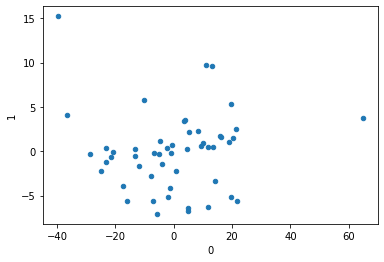

In [260]:
pca.pipe(plot_scatter)

Lets look at the extremes in order to interpret the diagram:

Top left corner:

In [261]:
temperatures[temperatures['state'] == pca[pca[0] == pca[0].min()].index[0]]

,year,month,state,state_name,temperature
120,2012.0,1.0,HI,Hawaii,21.9
121,2012.0,2.0,HI,Hawaii,21.2
122,2012.0,3.0,HI,Hawaii,21.0
123,2012.0,4.0,HI,Hawaii,21.3
124,2012.0,5.0,HI,Hawaii,22.3
125,2012.0,6.0,HI,Hawaii,23.1
126,2012.0,7.0,HI,Hawaii,23.5
127,2012.0,8.0,HI,Hawaii,24.1
128,2012.0,9.0,HI,Hawaii,23.8
129,2012.0,10.0,HI,Hawaii,24.1


Max right:

In [262]:
temperatures[temperatures['state'] == pca[pca[0] == pca[0].max()].index[0]]

,year,month,state,state_name,temperature
12,2012.0,1.0,AK,Alaska,-27.0
13,2012.0,2.0,AK,Alaska,-13.5
14,2012.0,3.0,AK,Alaska,-17.4
15,2012.0,4.0,AK,Alaska,-3.6
16,2012.0,5.0,AK,Alaska,2.6
17,2012.0,6.0,AK,Alaska,10.4
18,2012.0,7.0,AK,Alaska,11.4
19,2012.0,8.0,AK,Alaska,10.1
20,2012.0,9.0,AK,Alaska,4.5
21,2012.0,10.0,AK,Alaska,-4.4


Bottom:

In [263]:
temperatures[temperatures['state'] == pca[pca[1] == pca[1].min()].index[0]]

,year,month,state,state_name,temperature
180,2012.0,1.0,KS,Kansas,2.3
181,2012.0,2.0,KS,Kansas,2.8
182,2012.0,3.0,KS,Kansas,13.1
183,2012.0,4.0,KS,Kansas,15.2
184,2012.0,5.0,KS,Kansas,21.0
185,2012.0,6.0,KS,Kansas,25.8
186,2012.0,7.0,KS,Kansas,29.7
187,2012.0,8.0,KS,Kansas,25.3
188,2012.0,9.0,KS,Kansas,20.6
189,2012.0,10.0,KS,Kansas,12.4


By looking as the pca table, New Jersey seems around the middle:

In [264]:
temperatures[temperatures['state'] == 'NJ']

,year,month,state,state_name,temperature
348,2012.0,1.0,NJ,New Jersey,1.6
349,2012.0,2.0,NJ,New Jersey,3.4
350,2012.0,3.0,NJ,New Jersey,9.5
351,2012.0,4.0,NJ,New Jersey,11.2
352,2012.0,5.0,NJ,New Jersey,18.2
353,2012.0,6.0,NJ,New Jersey,20.8
354,2012.0,7.0,NJ,New Jersey,25.3
355,2012.0,8.0,NJ,New Jersey,23.5
356,2012.0,9.0,NJ,New Jersey,19.1
357,2012.0,10.0,NJ,New Jersey,13.5


In [265]:
(
    temperatures_pivot
    .pipe(pca_weather)
    .pipe(quadrant, True, False)
)

,0,1
state,,
CA,-10.028851,5.800633
DE,-4.726032,1.134904
FL,-36.607054,4.127213
GA,-23.075765,0.321479
HI,-39.605601,15.234551
NC,-13.151277,0.281571
NJ,-0.685053,0.696210
NM,-2.370890,0.341579


## Clustering states by climate

From https://en.wikipedia.org/wiki/Köppen_climate_classification

> The Köppen climate classification scheme divides climates into five main climate groups: A (tropical), B (dry), C (temperate), D (continental), and E (polar).

Although classifying be the 5 categories above requires precipitation information on top of temperature, it might still be a reasonable hint as to how many clusters to use.

In [238]:
def ratios_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
    return df.assign(cluster=pd.DataFrame(kmeans.predict(df), index=df.index))

In [239]:
def filter_cluster(df, cluster):
    return df[df['cluster'] == cluster]

In [240]:
def drop_cluster_col(df):
    return df.drop(columns=['cluster'])

In [241]:
def foreach_cluster(df, fn):
    for i in range(n_clusters):
        print(f"[*] cluster {i}")
        cluster = df.pipe(filter_cluster, i).pipe(drop_cluster_col)
        display(cluster)

In [242]:
n_clusters = 5

My interpretation of the 5 clusters, loosely based on the quote above:
- 0: this consists largely of southern states, 'warm'
- 1: mostly northern states, 'continental'
- 2: somewhere in between, 'temperate'
- 3: Alaska, 'polar'
- 4: Florida and Hawai, 'tropical'

In [266]:
(
    temperatures_pivot
    .pipe(ratios_kmeans, n_clusters)
    .pipe(foreach_cluster, cluster_dist)
)

[*] cluster 0


month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
AL,10.3,11.4,18.4,18.7,23.5,25.5,28.1,26.3,23.4,17.2,11.2,10.8
AR,7.1,8.5,17.1,18.1,23.3,25.9,29.4,27.2,23.3,15.4,10.4,8.2
AZ,7.0,7.4,11.0,15.9,21.0,26.2,26.9,27.2,23.4,17.5,12.0,5.4
GA,10.5,12.0,18.6,19.1,23.6,24.8,28.3,26.1,23.9,18.6,12.1,11.6
LA,13.1,13.6,20.0,21.0,25.1,27.3,28.3,28.2,25.7,19.3,14.4,13.1
MS,10.9,11.6,19.0,19.3,24.1,26.2,28.4,27.1,24.2,17.3,11.8,11.3
NC,6.9,8.0,15.2,15.4,21.3,22.8,27.3,24.7,21.5,15.6,8.4,8.9
OK,6.2,6.8,15.6,18.2,23.1,26.7,30.4,28.0,23.9,15.7,11.7,5.9
SC,9.6,10.8,17.8,18.3,23.2,24.3,28.6,26.0,23.6,18.1,11.0,11.3


[*] cluster 1


month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
CO,-1.9,-2.9,5.5,8.9,13.2,20.1,21.6,20.0,15.3,7.8,3.9,-3.8
ID,-3.7,-2.9,2.2,6.6,9.5,13.8,20.2,19.4,14.5,6.1,1.8,-4.0
MA,-1.8,0.2,6.3,8.8,15.6,18.2,22.5,21.7,16.4,11.4,3.6,0.9
ME,-7.4,-5.8,1.2,5.5,12.4,16.0,19.9,19.9,13.8,9.1,0.9,-3.8
MI,-3.4,-1.7,7.0,6.6,15.0,19.1,23.1,20.0,15.1,8.8,2.9,-0.3
MN,-7.3,-5.1,5.5,7.5,14.8,19.6,23.8,19.8,14.4,6.2,-0.3,-8.3
MT,-4.1,-4.1,4.0,7.1,10.0,15.9,21.6,19.4,14.7,4.9,0.4,-5.9
ND,-6.5,-5.9,5.1,7.9,13.2,19.1,23.8,20.2,15.0,5.3,-2.2,-10.3
NH,-5.3,-3.0,3.8,7.1,14.5,17.4,21.1,20.5,14.5,9.9,1.4,-1.9


[*] cluster 2


month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
CA,8.0,8.2,9.8,13.5,18.0,20.8,23.8,25.4,22.8,16.6,11.5,6.1
CT,0.7,2.2,7.3,9.7,16.0,18.9,23.3,22.4,17.8,13.0,5.1,3.2
DC,2.4,4.5,11.5,12.2,20.1,22.2,26.6,24.6,20.0,13.6,5.5,4.8
DE,3.6,4.8,10.4,12.2,18.7,21.5,26.1,24.4,20.1,14.6,6.3,6.2
IA,-2.6,-1.0,11.3,11.7,19.0,22.7,27.3,22.6,17.5,9.8,4.5,-1.9
IL,0.1,2.3,13.2,12.7,20.4,23.0,28.2,23.7,18.7,11.7,5.5,2.9
IN,0.4,2.2,13.0,12.0,20.4,22.7,27.5,23.0,18.5,11.5,5.0,3.6
KS,2.3,2.8,13.1,15.2,21.0,25.8,29.7,25.3,20.6,12.4,8.3,1.5
KY,3.7,5.2,14.7,14.2,21.4,23.1,27.6,24.2,20.1,13.2,6.7,6.2


[*] cluster 3


month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
AK,-27.0,-13.5,-17.4,-3.6,2.6,10.4,11.4,10.1,4.5,-4.4,-16.0,-20.5


[*] cluster 4


month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
FL,16.0,18.4,21.7,22.1,25.6,26.6,28.1,27.9,26.9,23.5,17.8,17.6
HI,21.9,21.2,21.0,21.3,22.3,23.1,23.5,24.1,23.8,24.1,23.0,22.4


In [267]:
state_climate_desc = [
    [0 , 'warm'],
    [1 , 'continental'],
    [2 , 'temperate'],
    [3 , 'polar'],
    [4 , 'tropical'],
]


In [268]:
state_climates = pd.DataFrame(state_climate_desc, columns=['climate', 'climate_desc'])

In [269]:
state_climates

,climate,climate_desc
0,0,warm
1,1,continental
2,2,temperate
3,3,polar
4,4,tropical


In [270]:
def merge_state_climate(df):
    return (
        df
        .reset_index()
        [['state', 'cluster']]
        .merge(state_climates, left_on='cluster', right_on='climate', how='inner')
        .drop(columns=['cluster'])
    )

In [271]:
state_climates = (
    temperatures_pivot
    .pipe(ratios_kmeans, n_clusters)
    .pipe(merge_state_climate)
)

In [272]:
state_climates

,state,climate,climate_desc
0,AK,3,polar
1,AL,0,warm
2,AR,0,warm
3,AZ,0,warm
4,GA,0,warm
5,LA,0,warm
6,MS,0,warm
7,NC,0,warm
8,OK,0,warm
9,SC,0,warm


In [297]:
state_climates.to_csv('../curated/state_climates.csv', index=False)

In [298]:
pd.read_csv('../curated/state_climates.csv').head()

,state,climate,climate_desc
0,AK,3,polar
1,AL,0,warm
2,AR,0,warm
3,AZ,0,warm
4,GA,0,warm


## Average temperature classification

From https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature#/media/File:Average_yearly_temperature_per_country.png:

In [273]:
average_temperature_categories = [
    [0, 'very cold (-5 to 4)'],
    [1, 'cold (5 to 9)'],
    [2, 'cool (10 to 14)'],
    [3, 'warm (15 to 19)'],
    [4, 'hot (20 to 24)'],
    [5, 'very hot (25 to 28)'],
]

In [274]:
temperature_categories = pd.DataFrame(
    average_temperature_categories,
    columns=['temp_cat', 'temp_cat_desc']
)

In [275]:
temperature_categories

,temp_cat,temp_cat_desc
0,0,very cold (-5 to 4)
1,1,cold (5 to 9)
2,2,cool (10 to 14)
3,3,warm (15 to 19)
4,4,hot (20 to 24)
5,5,very hot (25 to 28)


In [288]:
def to_temperature_category(temperature):
    if math.isnan(temperature):
        return temperature
    if temperature <= 4:
        return 0
    elif temperature <= 9:
        return 1
    elif temperature <= 14:
        return 2
    elif temperature <= 19:
        return 3
    elif temperature <= 24:
        return 4
    else:
        return 5

In [293]:
def to_temperature_categories(df):
    return (
        df
        .assign(temperature_cat=df['temperature'].apply(to_temperature_category))
    )

In [299]:
temperatures_classified = (
    temperatures
    .pipe(to_temperature_categories)
)

In [300]:
temperatures_classified

,year,month,state,state_name,temperature,temperature_cat
0,2012.0,1.0,AL,Alabama,10.3,2.0
1,2012.0,2.0,AL,Alabama,11.4,2.0
2,2012.0,3.0,AL,Alabama,18.4,3.0
3,2012.0,4.0,AL,Alabama,18.7,3.0
4,2012.0,5.0,AL,Alabama,23.5,4.0
...,...,...,...,...,...,...
612,NaN,NaN,AS,American Samoa,NaN,NaN
613,NaN,NaN,GU,Guam,NaN,NaN
614,NaN,NaN,MP,Northern Mariana Islands,NaN,NaN
615,NaN,NaN,PR,Puerto Rico,NaN,NaN


In [301]:
temperatures_classified.to_csv('../curated/temperatures_classified.csv', index=False)

In [302]:
pd.read_csv('../curated/temperatures_classified.csv').head()

,year,month,state,state_name,temperature,temperature_cat
0,2012.0,1.0,AL,Alabama,10.3,2.0
1,2012.0,2.0,AL,Alabama,11.4,2.0
2,2012.0,3.0,AL,Alabama,18.4,3.0
3,2012.0,4.0,AL,Alabama,18.7,3.0
4,2012.0,5.0,AL,Alabama,23.5,4.0
